In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="talk")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier

# import Dataset

In [2]:
df = pd.read_csv("dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

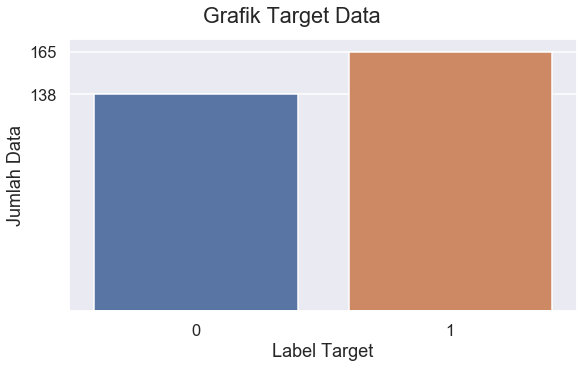

1    165
0    138
Name: target, dtype: int64


In [7]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
fig.suptitle("Grafik Target Data")
_ = sns.countplot(data=df, x="target", ax=ax)
_ = ax.set_xlabel("Label Target")
_ = ax.set_ylabel("Jumlah Data")
_ = ax.set_yticks([138, 165])

plt.show()

print(df["target"].value_counts(dropna=False))

In [8]:
kolom_numeric = ["age", "trestbps", "chol", "thalach", "oldpeak"]
kolom_categoric = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

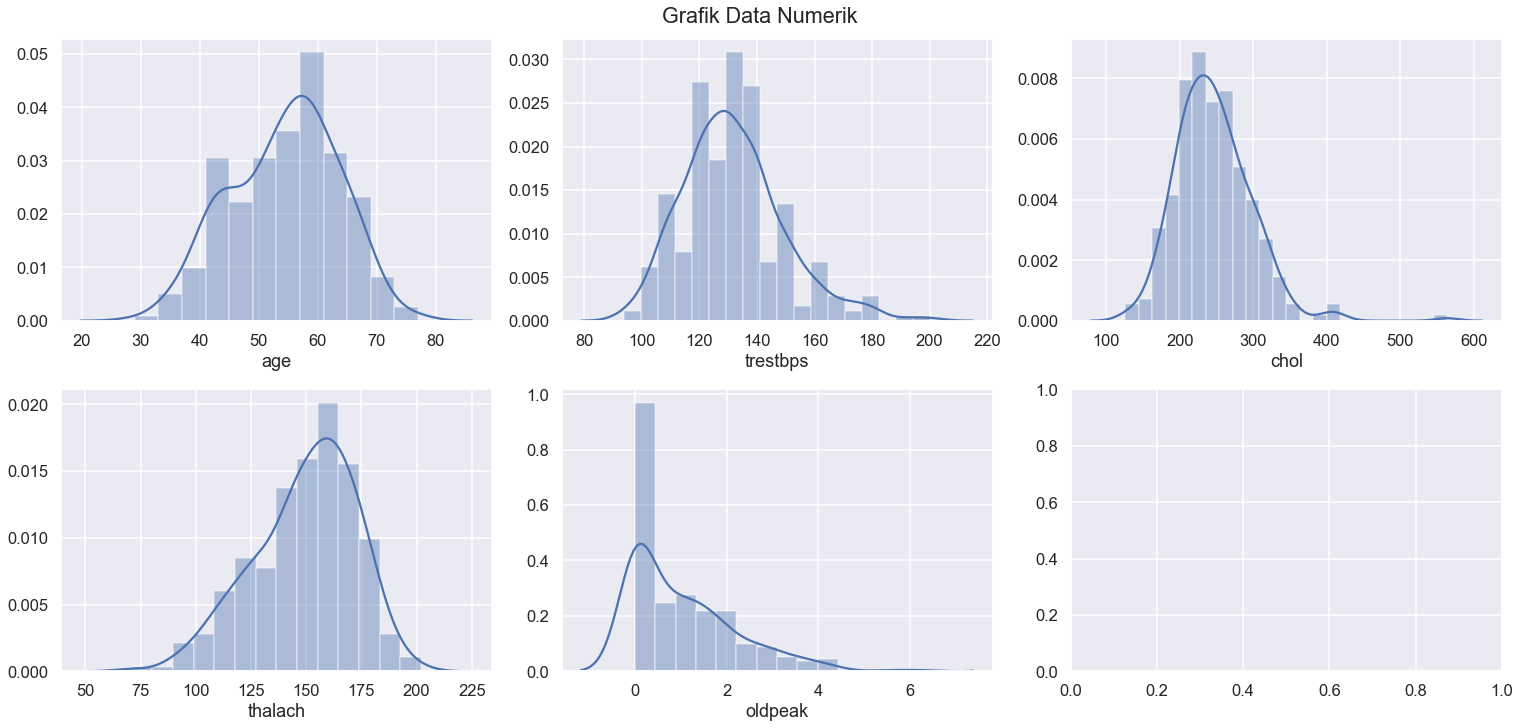

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(21, 10), constrained_layout=True)
fig.suptitle("Grafik Data Numerik")
for kol, ax in zip(kolom_numeric, ax.flatten()):
    _ = sns.distplot(a=df[kol], ax=ax)

plt.show()

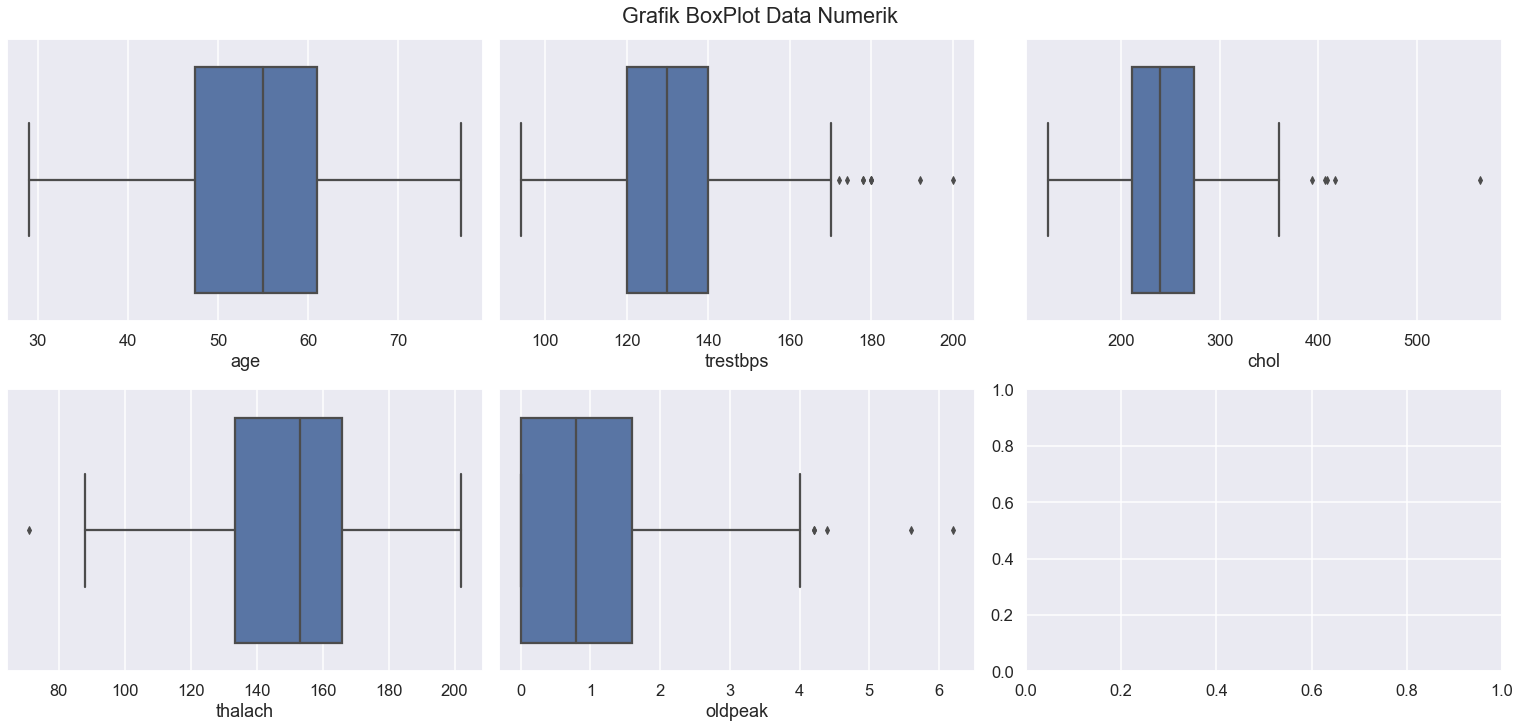

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(21, 10), constrained_layout=True)
fig.suptitle("Grafik BoxPlot Data Numerik")
for kol, ax in zip(kolom_numeric, ax.flatten()):
    _ = sns.boxplot(df[kol], ax=ax)

plt.show()

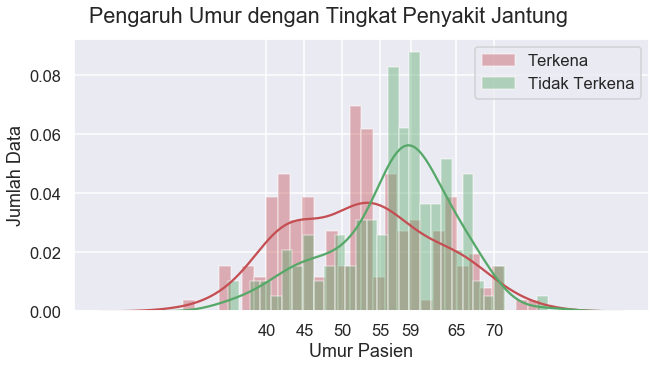

In [11]:
fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)
fig.suptitle("Pengaruh Umur dengan Tingkat Penyakit Jantung")
_ = sns.distplot(df[df["target"] == 1]["age"], label="Terkena", color="r", bins=30)
_ = sns.distplot(df[df["target"] == 0]["age"], label="Tidak Terkena", color="g", bins=30)
_ = ax.set_xlabel("Umur Pasien")
_ = ax.set_xticks([40, 45, 50, 55, 59, 65, 70])
_ = ax.set_ylabel("Jumlah Data")
ax.legend()
plt.show()

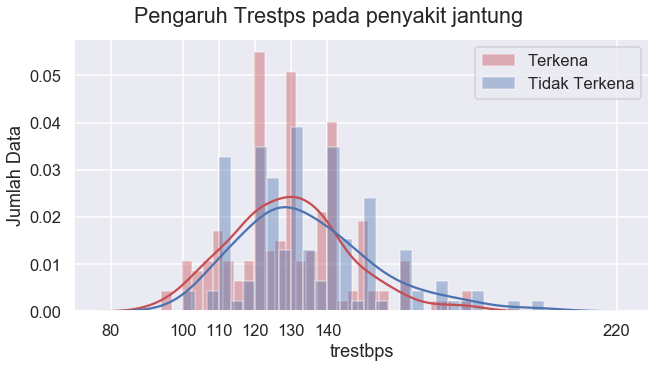

In [12]:
fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)
fig.suptitle("Pengaruh Trestps pada penyakit jantung")
_ = sns.distplot(df.loc[df["target"] == 1, "trestbps"], label="Terkena", color="r", ax=ax, bins=30)
_ = sns.distplot(df.loc[df["target"] == 0, "trestbps"], label="Tidak Terkena", color="b", ax=ax, bins=30)
_ = ax.set_ylabel("Jumlah Data")
_ = ax.set_xticks([80, 100, 110, 120, 130, 140, 220])
_ = ax.legend()
plt.show()

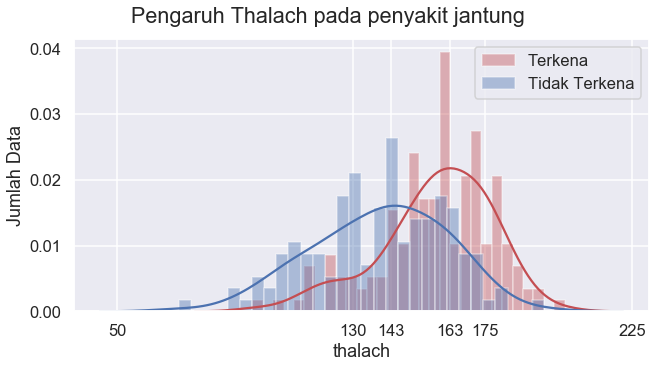

In [13]:
fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)
fig.suptitle("Pengaruh Thalach pada penyakit jantung")
_ = sns.distplot(df.loc[df["target"] == 1, "thalach"], label="Terkena", color="r", ax=ax, bins=30)
_ = sns.distplot(df.loc[df["target"] == 0, "thalach"], label="Tidak Terkena", color="b", ax=ax, bins=30)
_ = ax.set_ylabel("Jumlah Data")
_ = ax.set_xticks([50, 130, 143, 163, 175, 225])
_ = ax.legend()
plt.show()

## Categorical Column

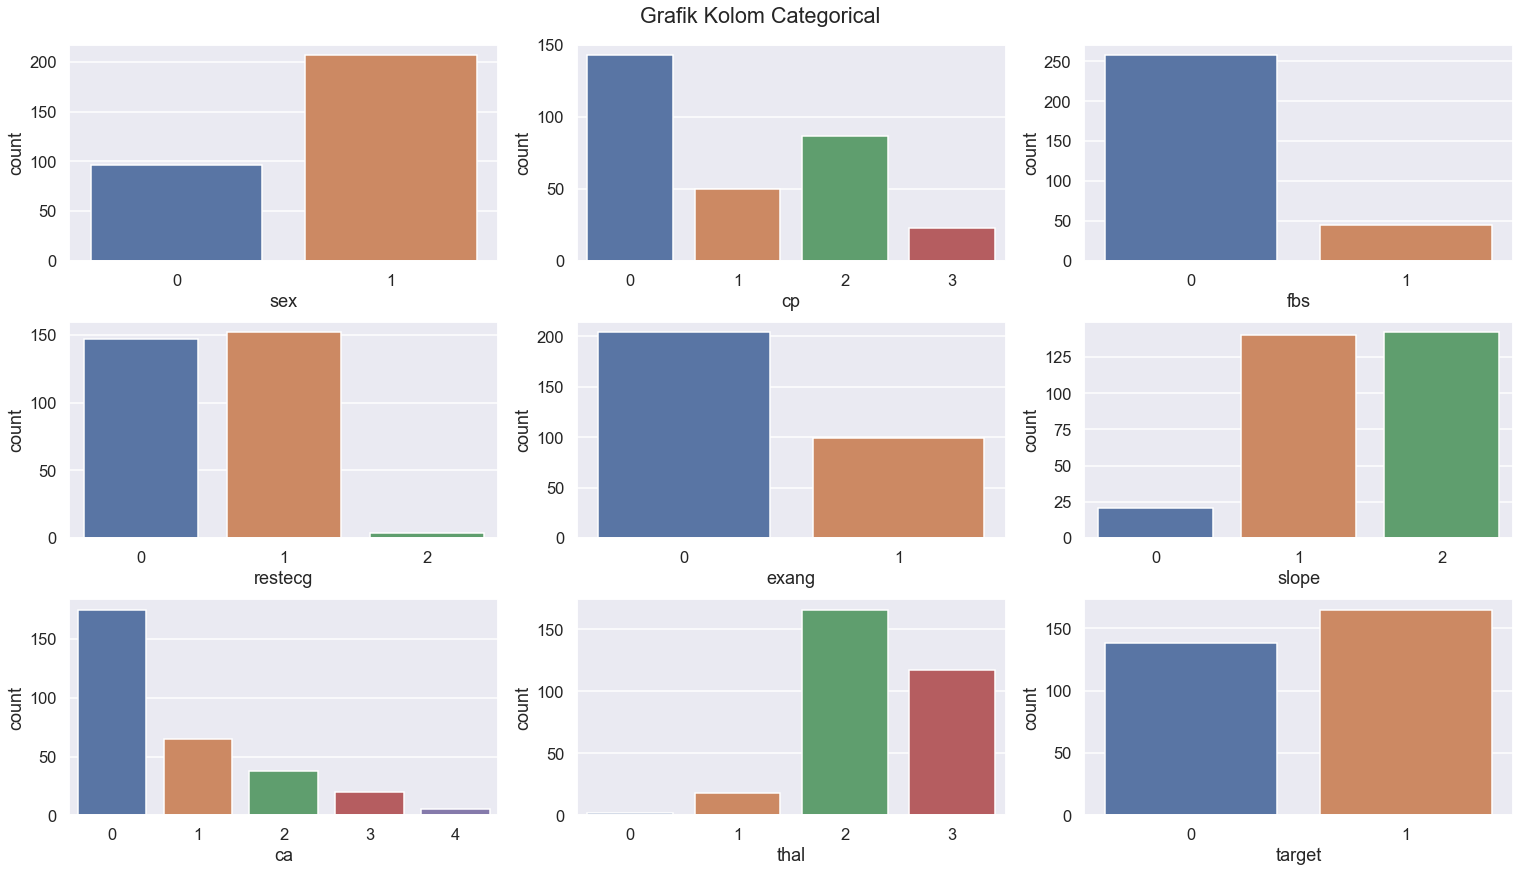

In [14]:
fig, ax = plt.subplots(figsize=(21, 12), ncols=3, nrows=3, constrained_layout=True)
fig.suptitle("Grafik Kolom Categorical")
for kol, ax in zip(kolom_categoric, ax.flatten()):
    _ = sns.countplot(data=df, x=kol, ax=ax)
plt.show()

## Menghapus Outlier

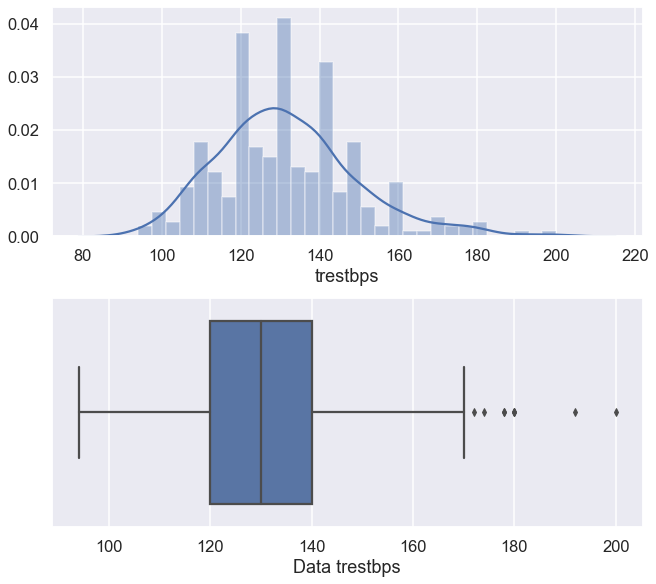

In [15]:
fig, ax = plt.subplots(nrows=2, figsize=(9, 8), constrained_layout=True)
_ = sns.distplot(df["trestbps"], ax=ax[0], bins=30)

_ = sns.boxplot(df["trestbps"], ax=ax[1])
_ = ax[1].set_xlabel("Data trestbps")

plt.show()

In [16]:
q1 = df["trestbps"].quantile(0.25)                 
q3 = df["trestbps"].quantile(0.75)
iqr = q3 - q1
batas_atas = q3 + (1.5 * iqr)
batas_bawah = q1 - (1.5 * iqr)
print(f"q1 = {q1}\nq3 = {q3}\niqr = {iqr}\nbatas atas = {batas_atas}\nbatas bawah = {batas_bawah}")

q1 = 120.0
q3 = 140.0
iqr = 20.0
batas atas = 170.0
batas bawah = 90.0


In [17]:
df = df.loc[(df["trestbps"] >= q1-(1.5 * iqr)) & (df["trestbps"]<=q3+(1.5*iqr))]

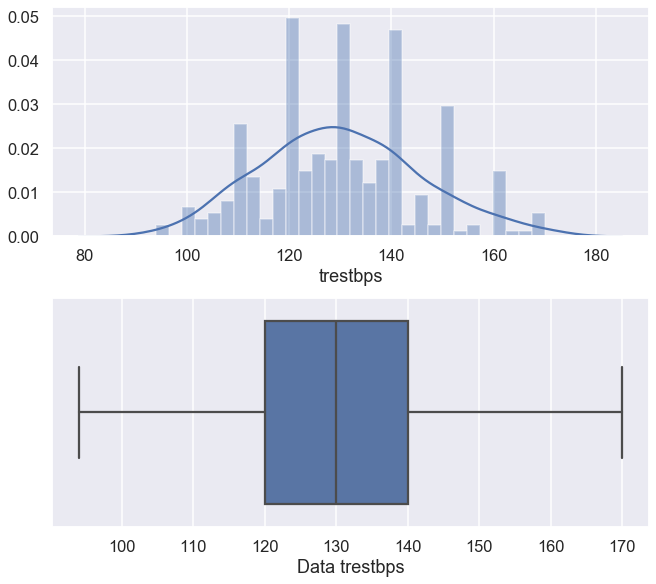

In [18]:
fig, ax = plt.subplots(nrows=2, figsize=(9, 8), constrained_layout=True)
_ = sns.distplot(df["trestbps"], ax=ax[0], bins=30)

_ = sns.boxplot(df["trestbps"], ax=ax[1])
_ = ax[1].set_xlabel("Data trestbps")

plt.show()

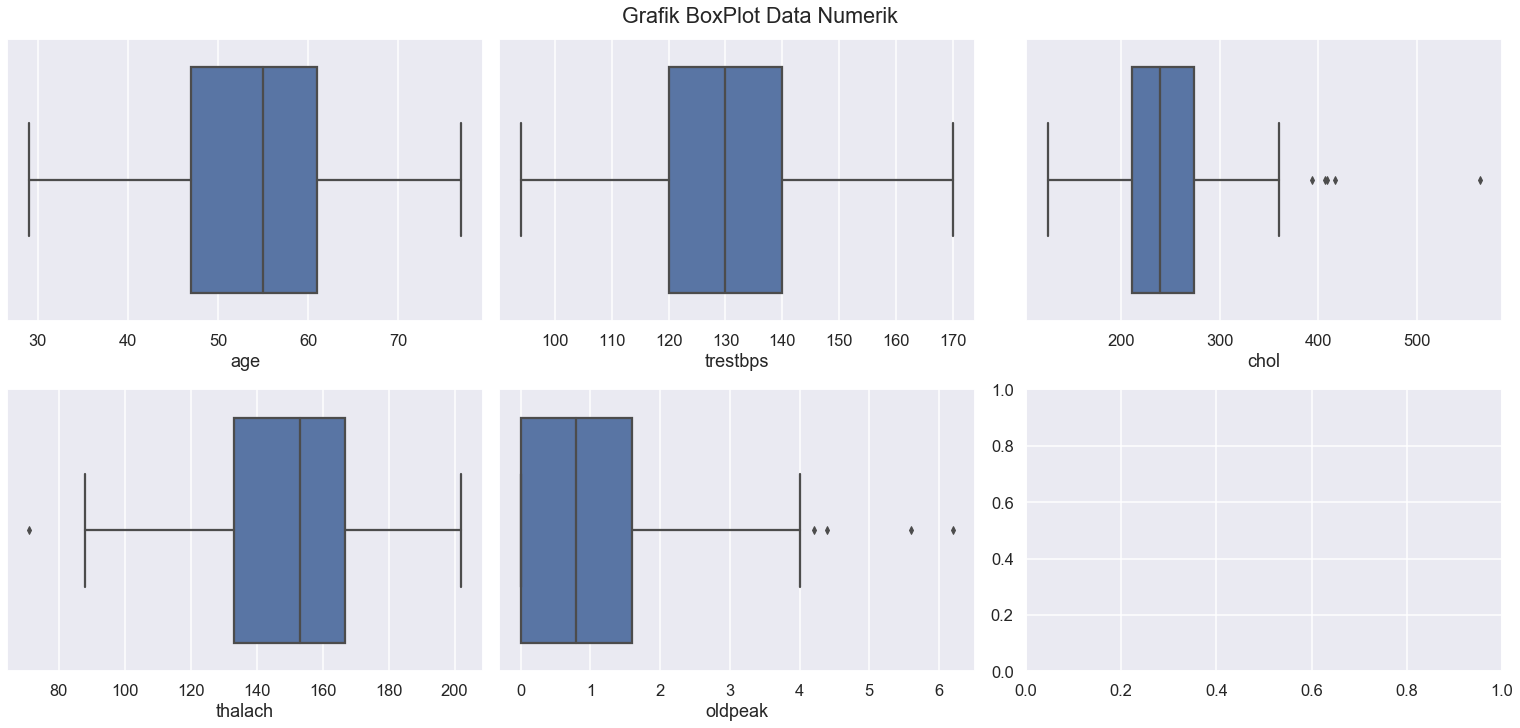

In [19]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(21, 10), constrained_layout=True)
fig.suptitle("Grafik BoxPlot Data Numerik")
for kol, ax in zip(kolom_numeric, ax.flatten()):
    _ = sns.boxplot(df[kol], ax=ax)

plt.show()

# Data Splitting

In [20]:
X = df.drop("target", axis="columns")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 13), (59, 13), (235,), (59,))

# Preprocessing

In [49]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalling", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [50]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3


# 1. Logistis Regression

In [90]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["age", "trestbps", "chol", "thalach", "oldpeak"]),
    ("categoric", categorical_pipeline, ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
])

pipeline_Logistic_Reg = Pipeline([
    ("prep", preprocessor),
    ("algoritma", LogisticRegression(random_state=42, n_jobs=-1))
])

In [91]:
pipeline_Logistic_Reg.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numeric',
                                    Pipeline(memory=None,
                                             steps=[('imputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='mean',
                                                                   verbose=0)),
                                                    ('scalling',
                                                     MinMaxScaler(copy=True,
                              

In [92]:
params_LR = {
    "algoritma__solver": ["lbfgs", "sag", "saga"],
    "algoritma__penalty": ["elasticnet"],
    "algoritma__C": np.arange(1, 1000, 1),
    'algoritma__l1_ratio': np.arange(0.1, 1, 0.001)
}

model_LR = RandomizedSearchCV(pipeline_Logistic_Reg,
                           param_distributions=params_LR, n_iter=200, 
                           cv=4, n_jobs=-1, 
                           verbose=0, 
                           random_state=42)

model_LR.fit(X_train, y_train)

C:\Users\ROG\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                         

In [95]:
print(model_LR.best_params_)
model_LR.score(X_train, y_train), model_LR.score(X_test, y_test)

{'algoritma__solver': 'saga', 'algoritma__penalty': 'elasticnet', 'algoritma__l1_ratio': 0.2190000000000001, 'algoritma__C': 9}


(0.8936170212765957, 0.8135593220338984)

# 2. KNN

In [87]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["age", "trestbps", "chol", "thalach", "oldpeak"]),
    ("categoric", categorical_pipeline, ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
])

pipeline_KNN = Pipeline([
    ("prep", preprocessor),
    ("algoritma", KNeighborsClassifier())
])

In [88]:
pipeline_KNN.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numeric',
                                    Pipeline(memory=None,
                                             steps=[('imputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='mean',
                                                                   verbose=0)),
                                                    ('scalling',
                                                     MinMaxScaler(copy=True,
                              

In [93]:
params_KNN = {
    "algoritma__metric": ["minkowski", "euclidean", "manhattan"],
    "algoritma__n_neighbors": np.arange(1, 100, 1),
    "algoritma__leaf_size": np.arange(1, 100, 1)
}

model_KNN = RandomizedSearchCV(pipeline_KNN,
                               param_distributions=params_KNN,
                               n_iter=200, 
                               cv=4, n_jobs=-1, 
                               verbose=0, 
                               random_state=42)

model_KNN.fit(X_train, y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                         

In [94]:
print(model_KNN.best_params_)
model_KNN.score(X_train, y_train), model_KNN.score(X_test, y_test)

{'algoritma__n_neighbors': 76, 'algoritma__metric': 'manhattan', 'algoritma__leaf_size': 37}


(0.8468085106382979, 0.7627118644067796)

# 3. Decision Tree

In [97]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["age", "trestbps", "chol", "thalach", "oldpeak"]),
    ("categoric", categorical_pipeline, ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
])

pipeline_DT = Pipeline([
    ("prep", preprocessor),
    ("algoritma", DecisionTreeClassifier())
])

In [98]:
pipeline_DT.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numeric',
                                    Pipeline(memory=None,
                                             steps=[('imputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='mean',
                                                                   verbose=0)),
                                                    ('scalling',
                                                     MinMaxScaler(copy=True,
                              